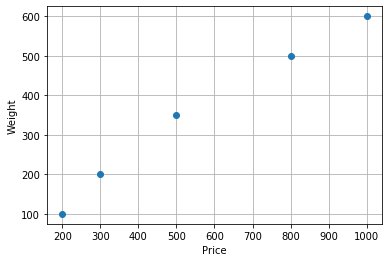

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

#X = [3, 4, 6, 8, 12, 15]
#y = [200, 300, 450, 570, 700, 900]

weight = [200, 300, 500, 800, 1000]
price = [100, 200, 350, 500, 600]

plt.plot(weight, price, 'o')
plt.xlabel('Price')
plt.ylabel('Weight')
plt.grid(True)

plt.show()

Linear Regression Model

In [7]:
from sklearn.linear_model import LinearRegression

X = [[200], [300], [500], [800], [1000], [1500]]  #weight
y = [100, 200, 350, 500, 600, 750]                #price

model = LinearRegression()
model.fit(X, y)

predict_price = model.predict([[400], [600], [1200]])

display(predict_price)

p_400 = format(predict_price[0], '.0f')
p_600 = format(predict_price[1], '.0f')
p_1200 = format(predict_price[2], '.0f')

print('400 grams =>', p_400, 'Baht')
print('600 grams =>', p_600, 'Baht') 
print('1200 grams =>', p_1200, 'Baht') 

array([259.88779804, 358.90603086, 655.96072931])

400 grams => 260 Baht
600 grams => 359 Baht
1200 grams => 656 Baht


Multiple Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression

X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]

#กรณีนี้ข้อมูล Label นี้ต้องเป็นแบบ 2 มิติเช่นเดียวกับ Feature 
y = [[7], [9], [13], [17.5], [18]]

model = LinearRegression() 
model.fit(X, y)

predict = model.predict([[5, 1], [12, 2], [16, 0]])

p5 = format(predict[0][0], '.2f') 
p12 = format(predict[1][0], '.2f') 
p16 = format(predict[2][0], '.2f')

print(f'Diameter: 5", Toppings: 1 -> {p5}$')
print(f'Diameter: 12", Toppings: 2 -> {p12}$')
print(f'Diameter: 16", Toppings: 0 -> {p16}$')


Diameter: 5", Toppings: 1 -> 6.64$
Diameter: 12", Toppings: 2 -> 14.10$
Diameter: 16", Toppings: 0 -> 17.35$


Support Vector Machine model

Prepare data for SVM model

,weight,price,profit
0,550,50,Y
1,1000,100,Y
2,1200,123,Y
3,1500,350,N
4,3500,200,Y
5,2500,300,Y
6,750,45,Y
7,1600,280,N
8,780,400,N
9,1300,450,N


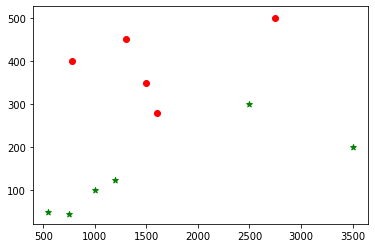

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dataset/svm.csv')
display(df)

w_yes = df[df.profit == 'Y'][['weight']]
p_yes = df[df.profit == 'Y'][['price']]

plt.scatter(w_yes, p_yes, marker='*', color='g')

w_no = df[df.profit == 'N'][['weight']]
p_no = df[df.profit == 'N'][['price']]

plt.scatter(w_no, p_no, marker='o', color='r')


SVM prediction

In [4]:
import pandas as pd
from sklearn import svm

df = pd.read_csv('dataset/svm.csv')
X = df[['weight', 'price']]
y = df['profit']

model = svm.SVC(kernel='linear')
model.fit(X, y)

a = model.predict([[2500, 400]]) 
b = model.predict([[2500, 200]])

print(a, b, sep='\n', end='\n\n')

a_ = 'ได้กำไร' if a[0] == 'Y' else 'ขาดทุน'
b_ = 'ได้กำไร' if b[0] == 'Y' else 'ขาดทุน'

print(f'น้ำหนัก 2500 กรัม, ราคา 400 บาท -> น่าจะ{a_}')
print(f'น้ำหนัก 2500 กรัม, ราคา 200 บาท -> น่าจะ{b_}')

['N']
['Y']

น้ำหนัก 2500 กรัม, ราคา 400 บาท -> น่าจะขาดทุน
น้ำหนัก 2500 กรัม, ราคา 200 บาท -> น่าจะได้กำไร


### Naive Bayes Classifier

In [8]:
import pandas as pd
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv('dataset/nbc.csv')
display(df)

weather = df.weather   #หรือ df['weather']
health = df.health
activity = df.activity

le = preprocessing.LabelEncoder()

w_enc = le.fit_transform(weather)
h_enc = le.fit_transform(health)
print('weather:', w_enc, '\n', 
      'health:', h_enc, '\n')

features = list(zip(w_enc, h_enc))
#print(features)

model = GaussianNB()
model.fit(features, activity)

predict = model.predict([[0, 1]])  #weather=sunny, health=bad
print('weather=sunny, health=bad ->', predict[0])


,weather,health,activity
0,sunny,good,go_out
1,rainy,bad,go_out
2,rainy,bad,stay_home
3,sunny,good,go_out
4,sunny,good,stay_home
5,sunny,good,go_out
6,sunny,good,go_out
7,rainy,good,stay_home
8,sunny,good,stay_home
9,rainy,bad,stay_home


weather: [1 0 0 1 1 1 1 0 1 0] 
 health: [1 0 0 1 1 1 1 1 1 0] 

weather=sunny, health=bad -> stay_home


### K-Nearest Neigbors Model

In [7]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('dataset/knn.csv')
display(df)

features = df[['height', 'weight']]
label = df['gender']

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(features, label)

predict = knn.predict([[155, 70], [180, 79]])

print('height: 155, weight: 70 ->', predict[0])
print('height: 180, weight: 79 ->', predict[1])

,height,weight,gender
0,158,64,male
1,170,86,male
2,183,84,male
3,191,80,male
4,155,49,female
5,163,59,female
6,180,67,female
7,158,54,female
8,170,76,female


height: 155, weight: 70 -> female
height: 180, weight: 79 -> male


In [9]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('dataset/winequality-red.csv', sep=';')
display(df[2:8].head(10))

features = df[::][['density', 'pH', 'alcohol']] 
labels = df['quality']

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(features, labels)

pdc = knn.predict([[0.9970, 3.6, 9.2],
                   [0.9946, 3.40, 9.5]])

q0 = pdc[0]
q1 = pdc[1]

print('density: 0.9970, ph: 3.6, alcohol: 9.2 -> quality: ', q0)
print('density: 0.9946, ph: 3.40, alcohol: 9.5 -> quality: ', q1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7


density: 0.9970, ph: 3.6, alcohol: 9.2 -> quality:  6
density: 0.9946, ph: 3.40, alcohol: 9.5 -> quality:  5


[[6.77777778 8.11111111]
 [2.         2.71428571]
 [7.66666667 5.33333333]]


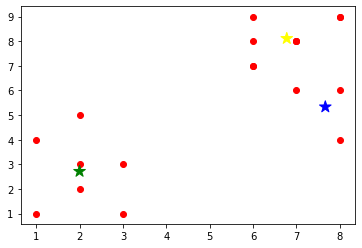

(2, 6) อยู่ในกลุ่มที่มี Centroid สี:  green


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('dataset/kmeans.csv')
#display(df)

X = list(zip(df['A'], df['B']))

model = KMeans(n_clusters=3)
model.fit(X)

centroids = model.cluster_centers_
print(centroids)

plt.scatter(df['A'], df['B'], c='r')

cols = ['yellow', 'green', 'blue']
plt.scatter(centroids[:, 0], centroids[:, 1], 
            marker='*', color=cols, s=150)   #s = marker size

plt.show()

predict = model.predict([[2, 6]])
c = cols[predict[0]]
print('(2, 6) อยู่ในกลุ่มที่มี Centroid สี: ', c)

,bmxleg,bmxwaist
0,40.2,81.0
2,40.3,64.6
3,40.5,80.1
4,42.1,86.7
5,31.0,59.8


[[ 38.72758473  85.05821536]
 [ 36.04064872  67.30131125]
 [ 38.60124294 124.07853107]
 [ 38.88755595 102.17390331]]


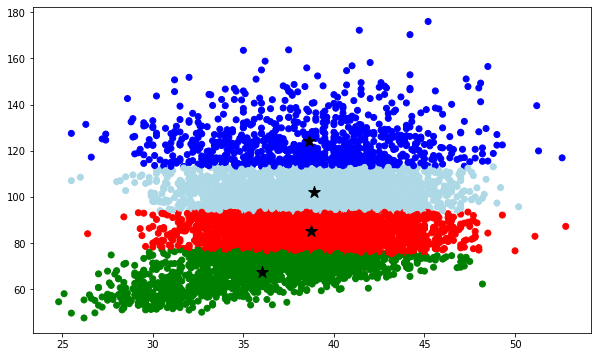

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('dataset/BMX_G.csv')
#print(df.shape)

#เฉพาะคอลัมน์ bmxleg และ bmxwaist
#โดยในบางเซลล์ อาจเป็นค่า nan 
#ซึ่งเราควรลบแถวที่มีเซลล์ดังกล่าวออกไป
df = df[['bmxleg', 'bmxwaist']].dropna()

#ลองดูแนวทางของข้อมูล 5 แถวแรก
display(df.head(5))

#สร้างชุดข้อมูลที่เป็นคู่ลำดับ [(bmbleg[0], bmwwaist[0]), ...]
X = list(zip(df['bmxleg'], df['bmxwaist']))

model = KMeans(n_clusters=4)
model.fit(X)

centroids = model.cluster_centers_
print(centroids)

#นำข้อมูลแต่ละตำแหน่งไปทำนายว่ามันอยู่กลุ่มใด
#ซึ่งจะได้ผลลัพธ์เป็นลิสต์ของลำดับกลุ่มของข้อมูลแต่ละตำแหน่ง
clusters = model.predict(X)

#กำหนดสีของแต่ละกลุ่ม
cols = ['red', 'green', 'blue', 'lightblue']

#เก็บสีของข้อมูลในแต่ละตำแหน่งตามกลุ่มของมัน
colors = []
for i in clusters:
    colors.append(cols[i])

#ถ้ากราฟเล็กเกินไป อาจกำหนดขนาดดังนี้    
plt.rcParams['figure.figsize'] = (10, 6) #width: 10 inches, height: 6 inches

#วาดตำแหน่งข้อมูล feature 
plt.scatter(df['bmxleg'], df['bmxwaist'], c=colors)

#วาดตำแหน่ง Centroid
plt.scatter(centroids[:, 0], centroids[:, 1], 
            marker='*', color='black', s=150)   #s = marker size

plt.show()

### load data and select range case of iris dataset

In [19]:
import pandas as pd

df_iris = pd.read_csv('dataset/iris.csv', index_col=0)

display(df_iris.head(3),
        df_iris[50:53],
        df_iris.tail(3))


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor


,sepal_length,sepal_width,petal_length,petal_width,species
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


### training and testing data split and prediction 

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = pd.read_csv('dataset/iris.csv', index_col=0)

X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]

# split dataset into trainning and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) #test_size=0.25

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# predict this value
predict = knn.predict([[5.0, 3.0, 1.5, 0.2]])

species = predict[0]

print(species)

setosa


### performance measure in accuracy

In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = pd.read_csv('dataset/iris.csv', index_col=0)

X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]

# split dataset into trainning and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

predict = knn.predict([[6.5, 3.2, 5.2, 2.0]])
species = predict[0]

accuracy = knn.score(X_test, y_test)
acc = format(accuracy, '0.2%')

print(f'species -> {species} \naccuracy -> {acc}')

species -> virginica 
accuracy -> 97.78%


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('dataset/winequality-red.csv', sep=';')
#display(df.head(10))

X = df[::][['density', 'pH', 'alcohol']] 
y = df['quality']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

accuracy = knn.score(X_test, y_test) 
print('accuracy: ' + format(accuracy, '.0%'))

accuracy: 55%
